In [38]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [39]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Oklahoma City Condo Regression

In [40]:
file_path = Path("../Resources/okc_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,44554.0,"Oklahoma City, OK",-51.769902,-5.349440
1996-02-29,44594.0,"Oklahoma City, OK",0.089779,-51.769902
1996-03-31,44806.0,"Oklahoma City, OK",0.475400,0.089779
1996-04-30,45095.0,"Oklahoma City, OK",0.645003,0.475400
1996-05-31,45509.0,"Oklahoma City, OK",0.918062,0.645003


<AxesSubplot:xlabel='date'>

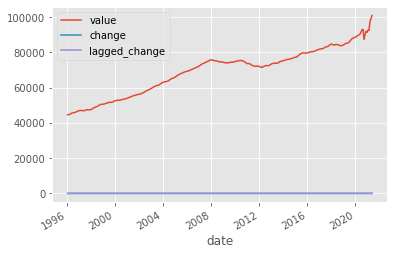

In [41]:
metro_df.plot()

In [42]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [43]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [44]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [45]:
predicted_y_values = model.predict(X)
predicted_y_values

array([-0.50552537, -5.45094454,  0.07394359,  0.11502591,  0.13309458,
        0.16218501,  0.09364114,  0.09893048,  0.07252353,  0.1148366 ,
        0.12455013,  0.14308267,  0.11486425,  0.08165855,  0.07845264,
        0.05327093,  0.06256353,  0.02692888,  0.11722186,  0.10381553,
        0.12534793,  0.06617519,  0.0527056 ,  0.04370342,  0.09342609,
        0.12186611,  0.15282712,  0.12795373,  0.14695427,  0.11550965,
        0.10656689,  0.11896361,  0.14282154,  0.14224818,  0.11980862,
        0.08170352,  0.05615264,  0.0880216 ,  0.09786874,  0.11708079,
        0.08130262,  0.1175726 ,  0.11502509,  0.08111228,  0.05674737,
        0.06004442,  0.10712279,  0.12957532,  0.12754344,  0.10481795,
        0.0787524 ,  0.08055256,  0.07063674,  0.07608018,  0.0722384 ,
        0.10143195,  0.10752451,  0.10455234,  0.07891449,  0.07452009,
        0.10430887,  0.11029512,  0.11620709,  0.09203063,  0.11719187,
        0.11050829,  0.11089081,  0.09949713,  0.09111186,  0.09

In [46]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.06437898469710654

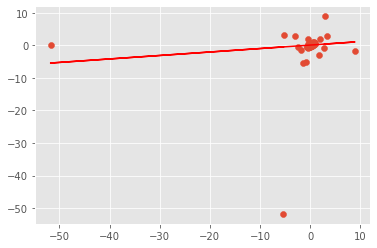

In [47]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [48]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [49]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.011372961910893209
R-squared (R2 ): 0.011372961910893209
Mean Squared Error (MSE): 9.468297309185614
Root Mean Squared Error (RMSE): 3.0770598481644154
Standard Deviation: 3.094708169137854


In [50]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [51]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [52]:
# Train the data
#classifier.fit(X_train, y_train)

In [53]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [54]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [55]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [56]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [57]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [58]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [59]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [60]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [61]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [63]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [64]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [65]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 10)             480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [66]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.0947
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0804
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0786
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0771
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0781
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0776
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0799
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0742
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0741
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0745


In [67]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 1.9001


1.9001432657241821

In [68]:
# Make some predictions
predicted = model.predict(X_test)

In [69]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [70]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,11.996969,-4.849427
2021-02-28,19.280959,-3.683111
2021-03-31,-51.374026,-2.392053
2021-04-30,-17.824634,-3.450474
2021-05-31,-20.808275,-3.254327


<AxesSubplot:xlabel='date'>

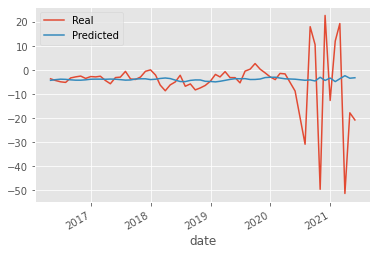

In [71]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [72]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)